# Monitor results

In [27]:
from exp import *

In [46]:
# results_file_name = 'segmentation_analysis_seed'
# columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']

# results_file_name = 'results/segmentation_analysis_seed'
# # columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']
# columns = ['Baseline','Segmented']

# results_file_name = 'results/color_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray']

# results_file_name = 'results/resnet_50_arl_seed'
# columns = ['Baseline','ARL']

# results_file_name = 'results/efficientnet_attention_analysis_run_seed'
# columns = ['Baseline','Without SE', "Without SE and with ARL", "With Both"]

# results_file_name = 'ben_analysis_seed'
# columns = ['Baseline','ben_color_transform']

# results_file_name = 'results/hsv_analysis_seed'
# columns = ['Baseline','HSV']

# results_file_name = 'results/color_ben_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray', 'Ben Graham']

results_file_name = 'results/third_take_resnet_50_arl_seed'
columns = ['Baseline_acc','ARL_acc']
auroc_cols = ['Baseline_auroc','ARL_auroc']

In [47]:
i=2
pd.read_csv(f'{results_file_name}_{i}.txt')

,Baseline_acc,Baseline_auroc,ARL_acc,ARL_auroc
0,0.686667,0.748611,0.660000,0.744722
1,0.846667,0.754722,0.826667,0.753889
2,0.826667,0.757778,0.853333,0.760556
3,0.826667,0.775556,0.826667,0.778056
4,0.826667,0.773611,0.826667,0.776667
5,0.853333,0.793611,0.846667,0.790278
6,0.826667,0.796389,0.813333,0.803889
7,0.833333,0.853611,0.853333,0.860000
8,0.820000,0.856111,0.833333,0.838055
9,0.840000,0.794167,0.813333,0.776945


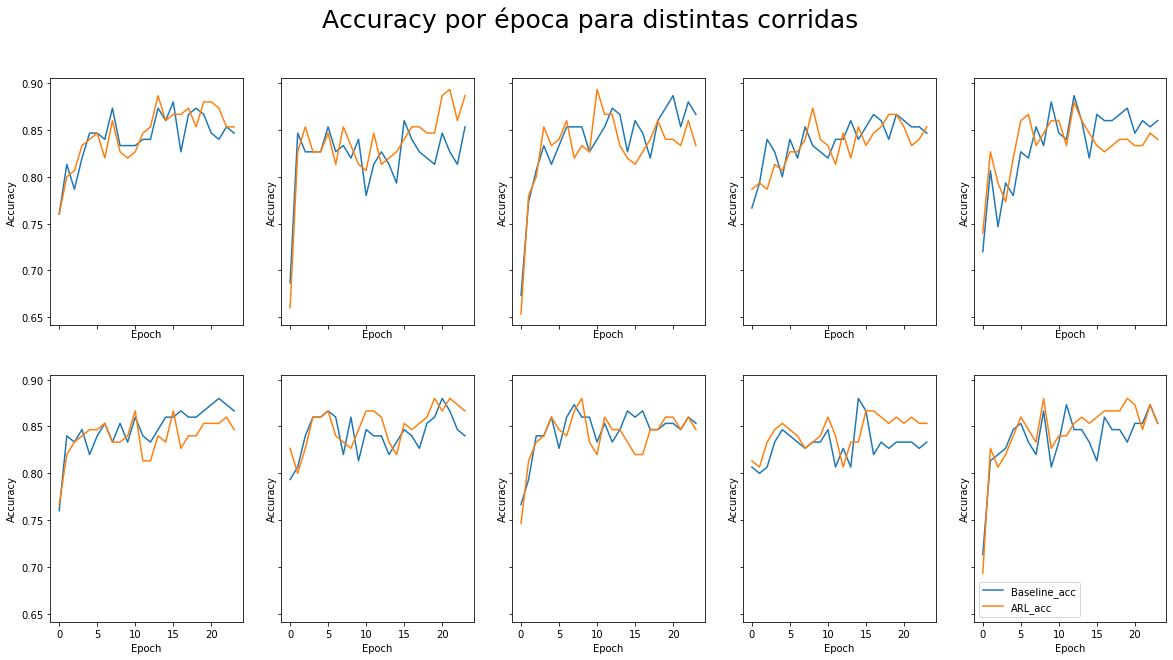

In [48]:
runs = {}
baseline = {}
fig, axs = plt.subplots(2,5, figsize=(20,10), sharey=True, sharex=True)
fig.suptitle('Accuracy por época para distintas corridas', fontsize=25)

for i in range(1,11):
#     baseline[i] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
    runs[i] = pd.read_csv(f'{results_file_name}_{i}.txt')
#     runs[i]['Baseline'] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
#     print(runs[i])
#     del runs[i]['Baseline SOG']
#     del runs[i]['Segmented SOG']
#     print(runs[i])
    for col in auroc_cols:
        del runs[i][col]
    ax = axs[(i-1) // 5 , (i-1) %5]
    ax.plot(runs[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

#     runs[i].plot()
plt.legend(runs[i].columns)


In [42]:
max_dicc = {col: [runs[r].max()[col] for r in runs] for col in columns }

max_dicc

{'Baseline_acc': [0.8799999952316284,
  0.8600000143051147,
  0.8866666555404663,
  0.8666666746139526,
  0.8866666555404663,
  0.8799999952316284,
  0.8799999952316284,
  0.8733333349227905,
  0.8799999952316284,
  0.8733333349227905],
 'ARL_acc': [0.8866666555404663,
  0.8933333158493042,
  0.8933333158493042,
  0.8733333349227905,
  0.8799999952316284,
  0.8666666746139526,
  0.8799999952316284,
  0.8799999952316284,
  0.8666666746139526,
  0.8799999952316284]}

In [43]:
df = pd.DataFrame(max_dicc)

In [44]:
def highlight_max(s):
    '''
    bold the maximum in a Series.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [45]:
df.describe().transpose().style.apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
Baseline_acc,10.000000,0.876667,0.008462,0.860000,0.873333,0.880000,0.880000,0.886667
ARL_acc,10.000000,0.880000,0.009428,0.866667,0.875000,0.880000,0.885000,0.893333
